## Simpson's Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Part 1: Implementing Simpson's Rule

The trapeziodal rule approximates the area under a curve by approximating the curve with straight line segments. We can often get a much better result if we approximate the function instead with a curve of some kind. Simpson's rule does exactly this, using quadratic curves. In order to specify a quadratic completely, you need three points, not just two as with a straight line. So in this method, we take a pair of adjacent slices and fit a quadratic through the three points that mark the boundaries of those slices. Simpson's rule involves approximating the integrand with quadratics this way, then calculating the area under those quadratics, which gives an approximation to the area under the true curve.

In [2]:
Image(url="./SimpsonsRule.png", width=400)

Suppose that our integrand is denoated $f(x)$ and the spacing of adjacent points is $h$. And for the purpose of argument that we have three points $-h, 0, h$. If we fit a quadratic $Ax^2 + Bx + C$ through these points, then by definition:

$$ f(-h) = Ah^2 - Bh + C$$

$$ f(0) = C$$

$$ f(h) = Ah^2 + Bh + C$$

Solving these equations simultaneously for $A$, $B$ and $C$ gives:

$$ A = \frac{1}{h^2} \left[ \frac{1}{2} f(-h) - f(0) + \frac{1}{2} f(h) \right] $$

$$ B = \frac{1}{2h} \left[ f(h) - f(-h) \right] $$

$$ C = f(0) $$

The area under the curve of $f(x)$ from $-h$ to $h$ is given by the approximation:

$$ \int^{h}_{-h} (Ax^2 + Bx + C) dx = \frac{2}{3} Ah^3 + 2Ch = \frac{1}{3} \left[ f(-h) + 4f(0) + f(h) \right] $$

To use Simpson's rule to perform a general integral, note that the equation above does not depend on the fact that our three points are $-h, 0, h$. If we were to slide the curve along the x-axis to higher or lower values, the area underneath would not change. So we can use Simpson's rule for any three uniformly spaced points. If we are integrating from $x=a$ to $x=b$ in slices of width $h$, then the three points bounding the first pair of slices fal at $x=a$, $x=a+h$, and $x = a + 2h$.

$$I(a, b) \approx \frac{1}{3}h \left[ f(a) + f(b) + 4\sum_{k\ odd} f(a + kh) + 2\sum_{k\ even} f(a + kh) \right]$$

Where $k\ odd = 1, 3 ... N - 1$ and $k\ even = 2, 4 ... N$. 
<b> Note, $N$ must be an even number. </b>

In [3]:
def my_integrand(x, a, b, c):
    # TO DO: Create a function that you can integrate by hand. 
    return a*(x**2) + b*x + c

In [4]:
def simpsons_rule(f, a, b, N, *args):
    """
    Calculates the integral of a function `f` using Simpson's Rule
    Parameters:
        f (function): the integrand in the form f(x, *args) 
        a (float): the lower bound on the integral
        b (float): the upper bound on the integral
        N (int): number of slices to use
        args: any additional arguments f needs to be evaluated (specifically included for the implementation below)
    Returns:
        (float) approximate area under the curve
    """
    # TO DO: Implement Simpson's Rule
    totalSum = f(a, *args) + f(b, *args)
    
    sumOdd = 0
    sumEven = 0
    h = (a - b) / 2
    
    for k in range(1, N+1):
        if k % 2 != 0:
            sumOdd += f(a + k*h, *args)
        else:
            sumEven += f(a + k*h, *args)
            
    totalSum += (4*sumOdd) + (2*sumEven)
    
    return (totalSum * h) / 3

In [5]:
assert((simpsons_rule(lambda x: x**2, 3, 5, 10000) - ((5**3)/3 - (3**3)/3)) < 0.01)
assert((simpsons_rule(lambda x: np.sin(x), 0, np.pi/2, 10000) - 1) < 0.01)

In [6]:
# TO DO: Create AT LEAST TWO non-trivial assert statements to test your Simpson's Rule function
assert((simpsons_rule(my_integrand, 1, 7, 10000, 4, 5, 6) - (108) < 0.01))
assert((simpsons_rule(my_integrand, 10, 20, 10000, 1, 12, 18) - (263.33) < 0.01))

### Part 2: Applying Simpson's Rule

Planetary nebula are the outer atmospheres of dying stars ejected into space. Astronomers model these nebulae to learn about the total mass they contain, and the details of how they were ejected. The image is of a rare, spherical-shell planetary nebula, Abell 38, photographed by astronomer George Jacoby (WIYN Observatory) and his colleagues using the giant, 4-meter Mayall Telescope at Kitt Peak, Arizona. Abell-38 is located 7,000 light years away in the constellation Hercules. The nebula is 5 light years in diameter and 1/3 light year thick. For other spectacular nebula images, visit the Hubble Space Telescope archive at
http://hubblesite.org/newscenter/archive/releases/nebula

In [7]:
Image(url="https://www.researchgate.net/profile/Stefan_Guthe/publication/233532800/figure/fig3/AS:670022301151234@1536757173124/The-planetary-nebula-Abell-39-and-reconstructions-assuming-spherical-symmetry-The.ppm", width=300)

We want to calculate the intensity of the nebula (shaded shell) at different radii from its center $(b)$ along a series of chords through the nebula $(AB)$. The intensity, $I(b)$ will be proportional to the density of gas within the nebula, which we define as $(r)$. The shell is spherically-symmetric, as is $D(r)$, so there are obvious symmetries in the geometry of the problem. Because $D(r)$ varies along the chord AB, we have to sum-up the contribution to $I(b)$ from each spot along AB. 

In [8]:
Image(url="./Diagram.png")

I'll spare you the effort of creating this integral. The intensity can be written as a function of $b$:

$$ I(b) = \int^{Ro}_{Ri} \frac{D_0 r}{\sqrt{(r^2 - b^2)}} dr $$

For the Abell 38 nebula we are interested in, $Ri = 2.2$ light years, $Ro = 2.5$ light years, and $D_0$ is a constant (for simplicity, just let $D_0 = 1$). 

In [9]:
def integrand(r, b, D0):
    # TO DO: Write a function for the integrand for the integral described above
    return (D0*r) / ((r*r - b*b)**0.5)

In [10]:
def intensity(b):
    # TO DO: Write a function for the intensity integral using your Simpson's Rule function
    return simpsons_rule(integrand, 2.2, 2.5, 10000, b, 1)

Now let's plot the intensity versus $b$ (the radial distance from the center of the nebula) from $b = 0$ to $b = 3.0$. Notice once $b^2 > r^2$ the value inside the square root will be negative. This is ok. We can handle this by letting `
b` be a complex array and just plotting the real value of `b` and `I`. I've created the `b` array for you below. 

/Users/calistawilk/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


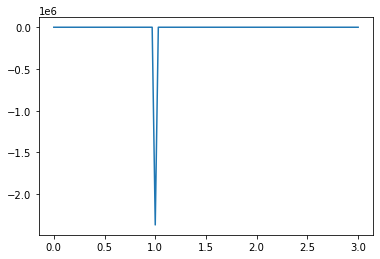

In [11]:
# TO DO: Create a line plot of the intensity using b values from 0 to 3.0
b = np.linspace(0, 3.0, 100, dtype=np.complex128)
plt.plot(b, intensity(b))

Now, let's create a density plot of this intensity. Since `b` is a radial value, you'll have to `meshgrid` X and X arrays and then convert them to a radius $(r = \sqrt{x^2 + y^2})$. Then pass this "radial matrix" into your intensity function. When you plot the output it should look like the nebula image above! 

Hint: Your nebula will be centered at (0,0) so in order to get the 'full nebula' in the picture, you'll want your X and Y arrays to go from [-3.0, 3.0]. 

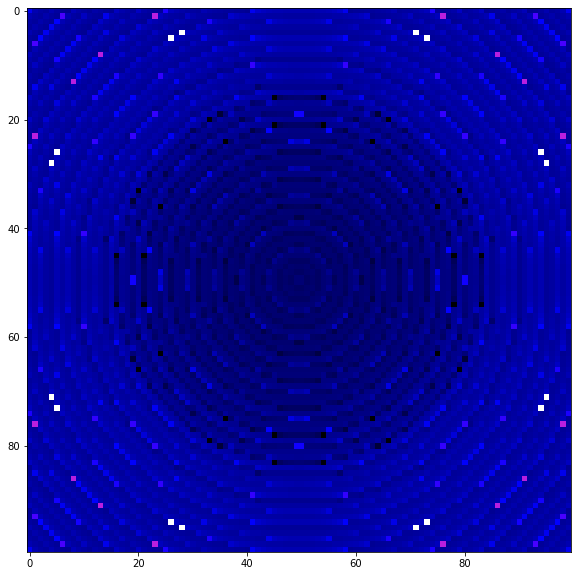

In [17]:
# TO DO: Create a density plot of your intensity values for b values from 0 to 3.0
# x.real, y.real = 0 # random num -- change
plt.figure(figsize=(10,10))
b = np.linspace(-3.0, 3.0, 100, dtype=np.complex128)
xx, yy = np.meshgrid(b, b)
RR = (xx**2 + yy**2)**0.5
I = intensity(RR)
# plt.imshow(I.real, vmax=4, cmap="gnuplot2")
plt.imshow(I.real, cmap="gnuplot2")